In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
startyear = 2010
endyear = 2018
df = pd.DataFrame()

In [3]:
for y in range(startyear, endyear+1):
    file_name = 'data/' + str(y) + '_articles.csv'
    articles = pd.read_csv(file_name, index_col=0)
    df = pd.concat([df, articles])

In [4]:
df = df.drop_duplicates(subset=['name'], keep='first')

In [5]:
dates = []
for i in range(0, len(df.groupby(['year', 'month']).count()['name'])):
    dates.append(str(df.groupby(['year', 'month']).count()['name'].index[i][1]) + '-' +
                 str(df.groupby(['year', 'month']).count()['name'].index[i][0]))

count_of_articles = df.groupby(['year', 'month']).count()['name'].values

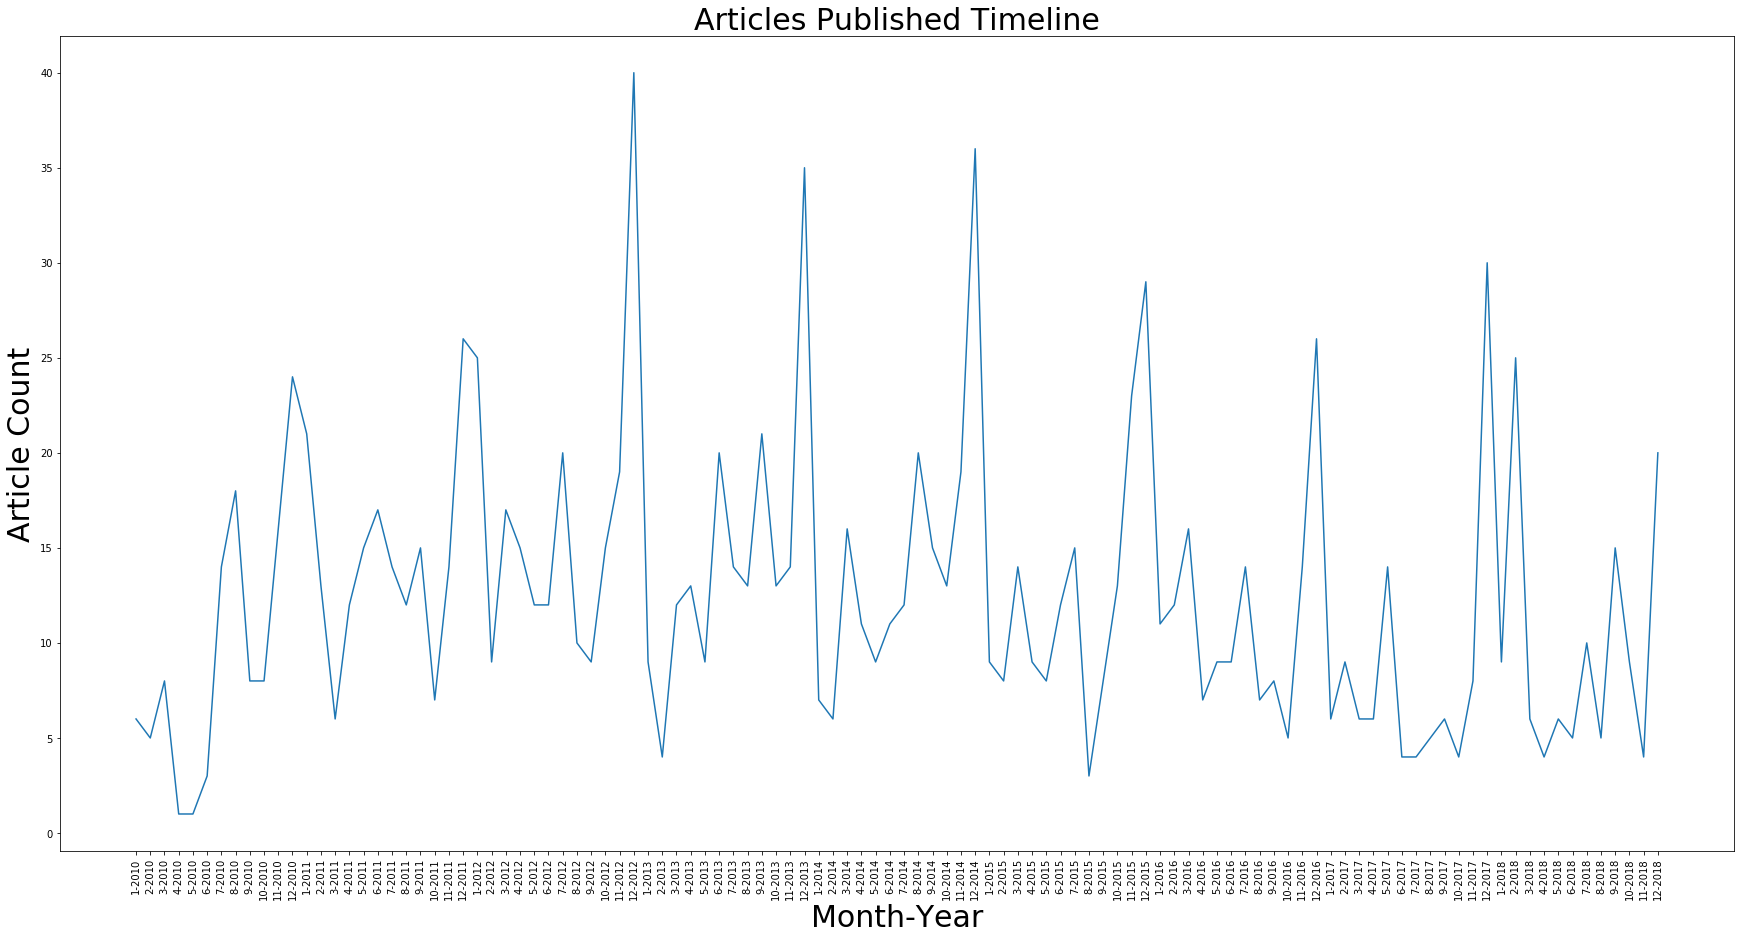

In [6]:
plt.subplots(figsize=(30, 15))
plt.plot(dates, count_of_articles)
plt.xlabel('Month-Year', fontsize=30)
plt.ylabel('Article Count', fontsize=30)
plt.xticks(rotation=90)
plt.title('Articles Published Timeline', fontsize=30)
plt.savefig('results/articlegraph.png', dpi=100, bbox_inches='tight')
plt.show()

In [7]:
df['article'].values[240]

'NEW DELHI: About 100, 000 fresh HIV cases among the general population were averted in India in five years by targeting the most vulnerable section. A study — conducted jointly by the Institute for Health Metrics and Evaluation, University of Washington, University of Hong Kong and the Public Health Foundation of India (PHFI) — has found that Avahan successfully slowed the transmission of HIV among the general population by raising the coverage of prevention interventions in high-risk groups like female sex workers, their clients and partners, men who have sex with men (MSM), intravenous drug users and truck drivers. Launched in 2003, Avahan received $258 million from the Bill and Melinda Gates Foundation, and complemented the government’s own efforts on HIV prevention. The programme was implemented in four large states — Andhra Pradesh, Karnataka, Maharashtra and Tamil Nadu — and two small northeastern states of Manipur and Nagaland. These six states were estimated to have the highes

In [8]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [9]:
nltk.download('stopwords')
stops = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /home/vedang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def clean_text(text):
    
    text = text.lower().split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"([0-9]+),([0-9]+)", r'\1\2', text)
    text = re.sub(r"([0-9]+),([0-9]+)", r'\1\2', text)
    text = re.sub(r"([0-9]+),([0-9]+)", r'\1\2', text)
    text = re.sub(r"([0-9]+),([0-9]+)", r'\1\2', text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r"([a-z]+)([0-9]+)", r"\1 \2 ", text);
    text = re.sub(r"([0-9]+)([a-z]+)", r"\1 \2", text);
    
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    
    return text

In [11]:
df['article'] = df['article'].map(lambda x: clean_text(x))

In [12]:
df['article'].values[240]

'new delhi : 100 000 fresh hiv case among general popul avert india five year target vulner section studi conduct joint institut health metric evalu univers washington univers hong kong public health foundat india phfi found avahan success slow transmiss hiv among general popul rais coverag prevent intervent high - risk group like femal sex worker client partner men sex men msm intraven drug user truck driver launch 2003 avahan receiv 258 million bill melinda gate foundat complement govern s effort hiv prevent programm implement four larg state andhra pradesh karnataka maharashtra tamil nadu two small northeastern state manipur nagaland six state estim highest hiv preval india 2003 total popul 300 million studi assess popul - level effect avahan hiv - prevent initi india publish british medic journal lancet say intervent like safe - sex counsel peer clinic servic like treatment sexual transmit infect distribut free condom needl syring exchang programm among most - at - risk popul preve

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
count_vector = count_vectorizer.fit_transform(df['article'])
count = []

count.append(count_vectorizer.get_feature_names())
count_vector = count_vector.toarray()
count_vector = count_vector.tolist()
count = count + count_vector

count = pd.DataFrame(count)
header = count.iloc[0]
count = count[1:]
count.columns = header

In [14]:
top_100_idx = np.argsort(count.values.sum(axis=0))[-100:]

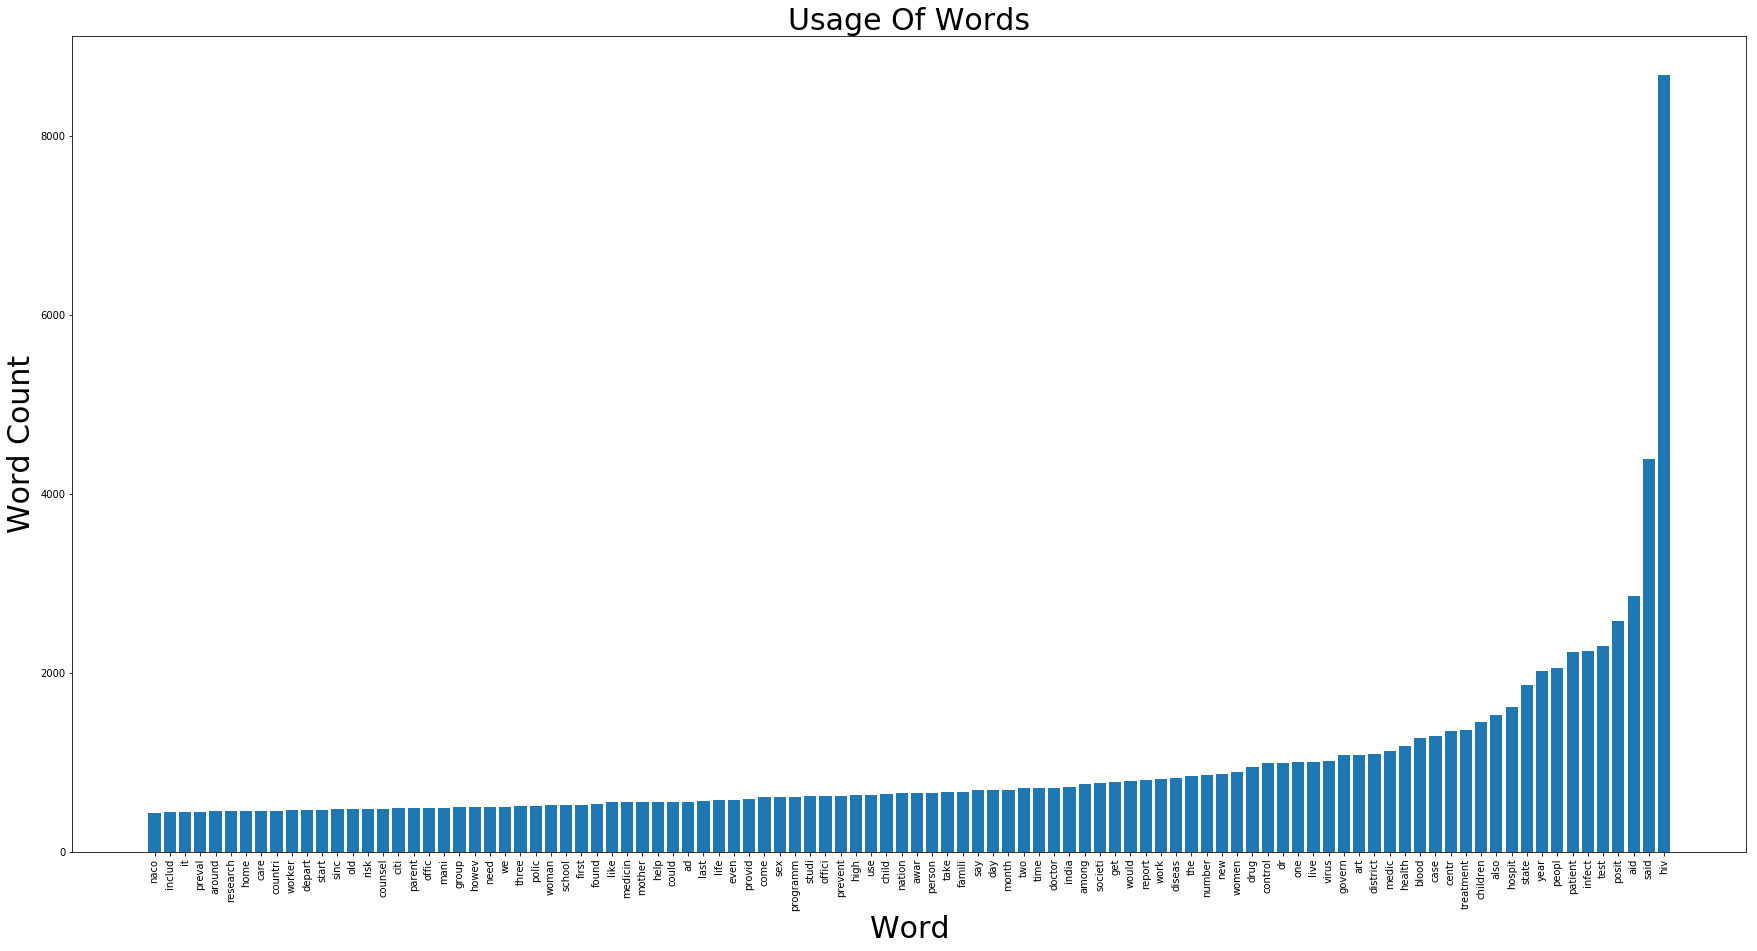

In [15]:
plt.subplots(figsize=(30, 15))
plt.bar(count.iloc[:, top_100_idx].sum(axis=0).index, count.iloc[:, top_100_idx].sum(axis=0).values)
plt.xlabel('Word', fontsize=30)
plt.ylabel('Word Count', fontsize=30)
plt.title('Usage Of Words', fontsize=30)
plt.xticks(rotation=90)
plt.savefig('results/wordcount.png', dpi=100, bbox_inches='tight')
plt.show()

In [16]:
from sklearn.cluster import KMeans
number_of_clusters=10
km = KMeans(n_clusters=number_of_clusters)
km.fit(count)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = count_vectorizer.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :10]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: hiv test posit said peopl aid infect year women also
Cluster 1: hiv infect new treatment peopl aid million year india number
Cluster 2: hiv aid state said year case peopl sex infect among
Cluster 3: hiv children said posit school year aid peopl also live
Cluster 4: hiv infect virus said cell research drug studi aid new
Cluster 5: hiv said aid posit year test infect peopl also state
Cluster 6: art patient centr hiv said treatment aid drug line hospit
Cluster 7: blood hiv test said bank infect transfus hospit state posit
Cluster 8: hiv infect test virus aid vaccin antibodi india bnab peopl
Cluster 9: hiv patient hospit said posit treatment doctor dr medic tb


In [18]:
y_count = km.predict(count)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=0.1, max_features=100)
tfidf_vector = tfidf_vectorizer.fit_transform(df['article'])
tfidf = []

tfidf.append(tfidf_vectorizer.get_feature_names())
tfidf_vector = tfidf_vector.toarray()
tfidf_vector = tfidf_vector.tolist()
tfidf = tfidf + tfidf_vector

tfidf = pd.DataFrame(tfidf)
header = tfidf.iloc[0]
tfidf = tfidf[1:]
tfidf.columns = header

In [21]:
from sklearn.cluster import KMeans
number_of_clusters=10
km = KMeans(n_clusters=number_of_clusters)
km.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :10]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: polic said case famili posit home year old children report
Cluster 1: test women posit said case district mother aid year state
Cluster 2: research virus infect drug studi said use new india patient
Cluster 3: aid state said sex preval awar among district peopl control
Cluster 4: peopl posit live said aid life year say also famili
Cluster 5: hospit patient doctor said dr medic posit treatment report govern
Cluster 6: blood test hospit infect said report posit doctor govern state
Cluster 7: children school parent said posit home child year live aid
Cluster 8: art patient centr treatment said aid drug peopl medicin test
Cluster 9: woman said hospit posit polic old year medic famili child


In [23]:
y_tfidf = km.predict(tfidf)

In [24]:
tfidf_sample = tfidf.sample(frac=0.1)
name_list = pd.DataFrame(df['name'].values[tfidf_sample.index - 1], columns=['name'])

In [25]:
y_tfidf_sample = km.predict(tfidf_sample)

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_sample)

In [27]:
from sklearn.manifold import MDS
mds = MDS(n_components=2, dissimilarity='precomputed')
pos = mds.fit_transform(dist)

In [28]:
import random
cluster_names = {i:'Cluster ' + str(i) for i in range(number_of_clusters)}
cluster_colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(number_of_clusters)]

In [29]:
temp = pd.DataFrame(dict(x=pos[:,0], y=pos[:,1], label=y_tfidf_sample, title=name_list['name']))

In [30]:
groups = temp.groupby('label')

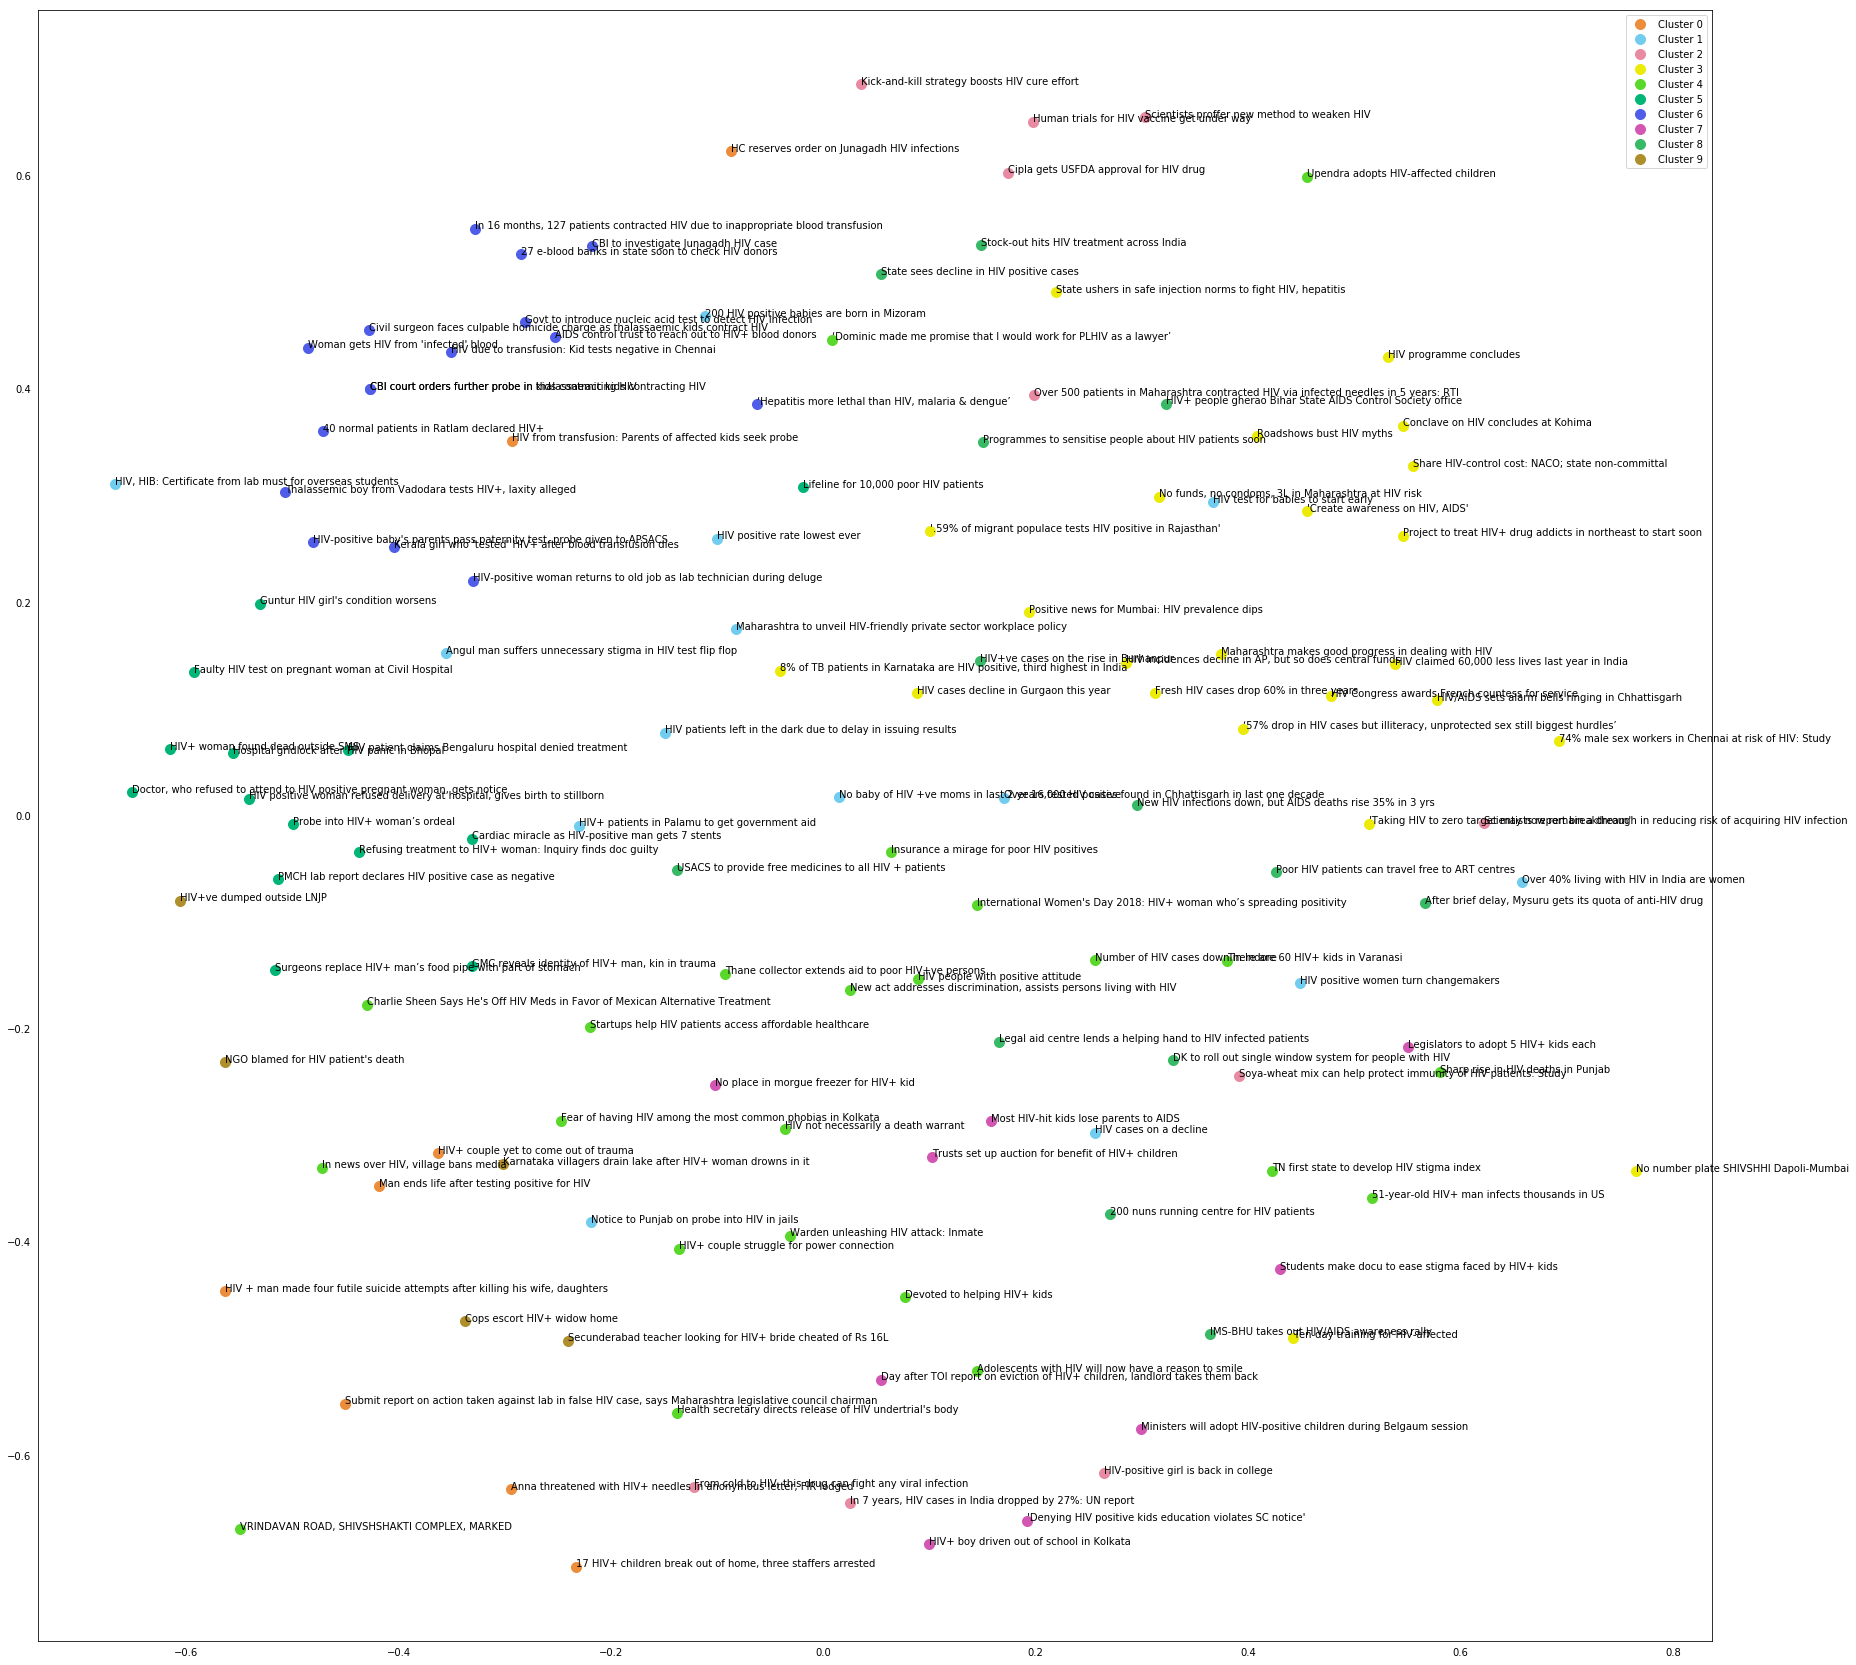

In [31]:
fig, ax = plt.subplots(figsize=(30, 30))

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=10, label=cluster_names[name], color=cluster_colors[name])
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True, labelsize=10)
    ax.tick_params(axis='y', which='both', left=False, top=False, labelleft=True, labelsize=10)
    
ax.legend(numpoints=1)

for i in range(len(temp)):
    ax.text(temp.iloc[i]['x'], temp.iloc[i]['y'], temp.iloc[i]['title'], size=10)
    
plt.savefig('results/cluster.png', dpi=100, bbox_inches='tight')
plt.show()

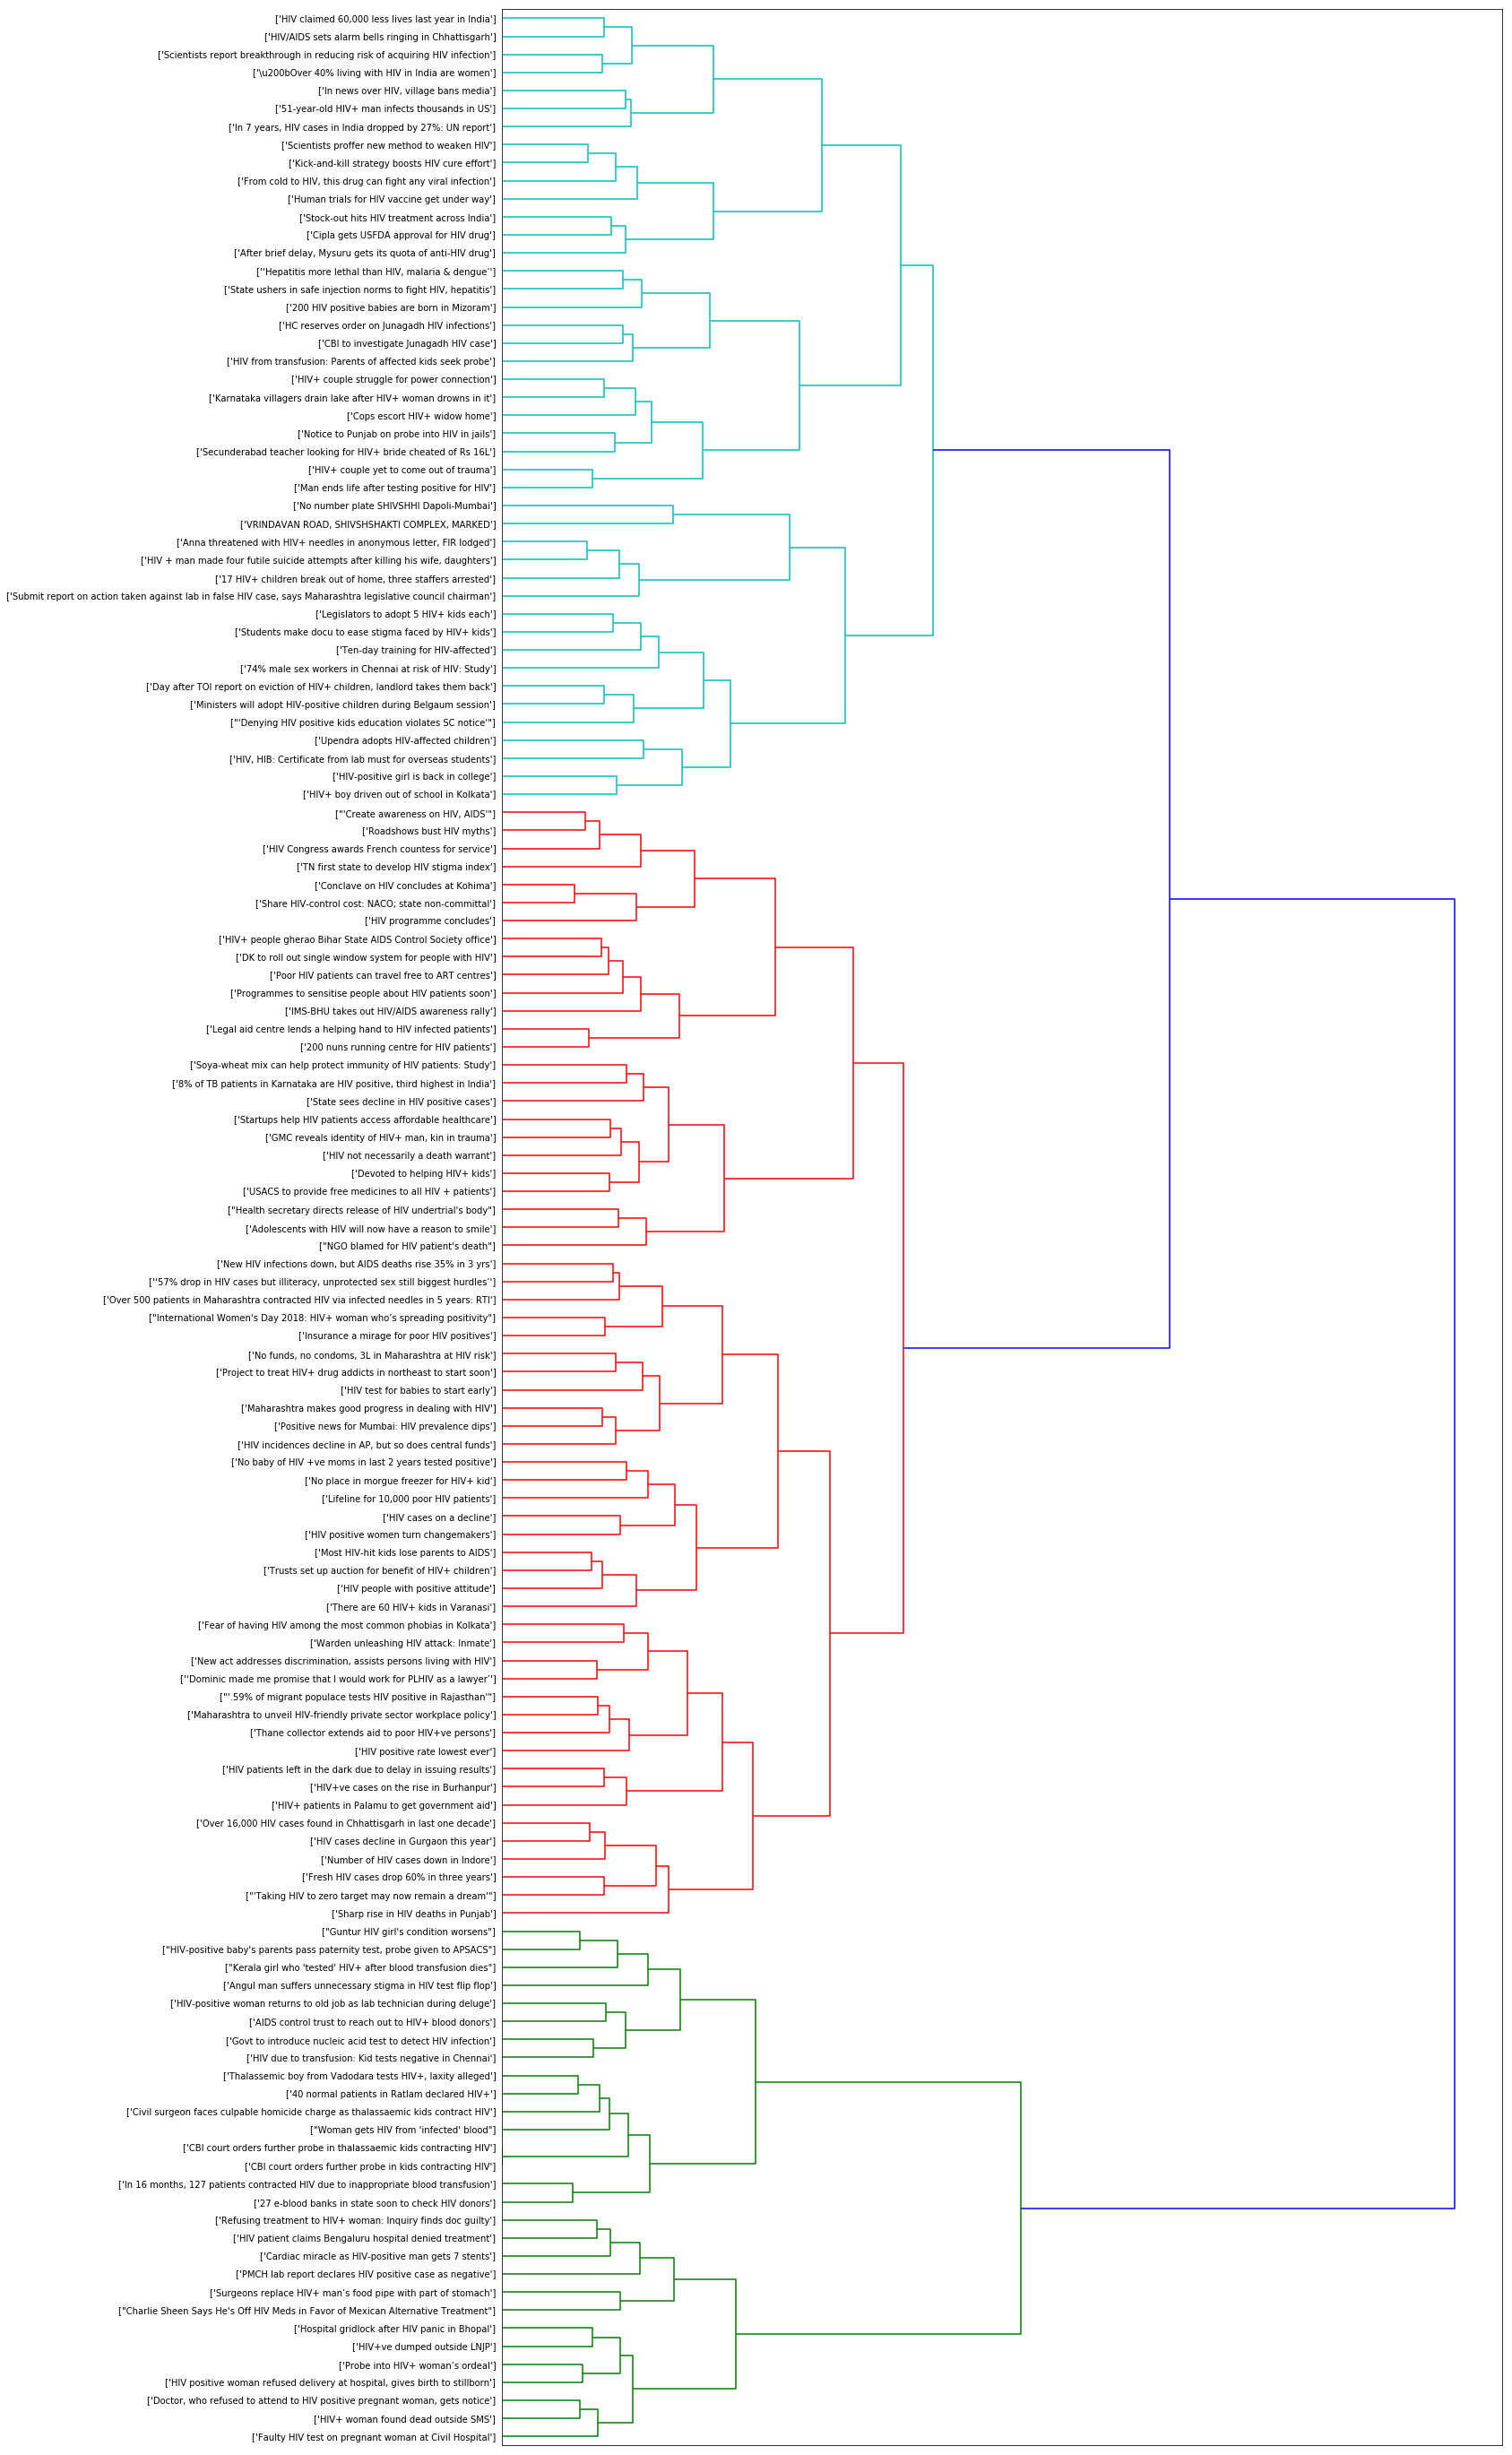

In [32]:
from scipy.cluster.hierarchy import ward, dendrogram

matrix = ward(dist)

fig, ax = plt.subplots(figsize=(20, 50))
ax = dendrogram(matrix, orientation="right", labels=name_list.values);

plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labelsize=10)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, labelsize=10)

plt.savefig('results/dendrogram.png', dpi=100, bbox_inches='tight')
plt.show()